In [2]:
%load_ext autoreload
%autoreload 2

from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import  matplotlib
matplotlib.rcParams['figure.figsize'] = (15, 15)


import sys
import os

sys.path.append(os.path.join(os.path.abspath('.'),'..'))

# Welcome!

This is the empty notebook for plankton's data handling tutorial, which can be found at [https://link-url-here.org](https://link-url-here.org)

To make it easier, we already implemented the data loading routine that fetches Qian&al's Hippocampal ISS data set and opens it into 'qian_et_al':

### Loading spot data 

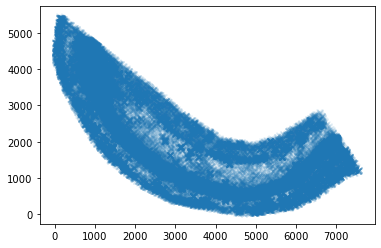

In [3]:
import requests
import io

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ISS_url = 'https://github.com/acycliq/pciSeq/blob/dev/pciSeq/data/mouse/ca1/iss/spots.csv?raw=true'

response = requests.get(ISS_url)
response.raise_for_status()
spot_data = pd.read_csv(io.BytesIO(response.content),)
# plt.imshow(cell_map,cmap='nipy_spectral')
plt.scatter(spot_data.x,spot_data.y,marker='x',alpha=0.1)

# Single cell data:

### Loading single-cell sequencing data

In [3]:
import anndata

sc_url = 'https://github.com/acycliq/pciSeq/blob/dev/pciSeq/data/mouse/ca1/scRNA/scRNAseq.csv.gz?raw=true'
response = requests.get(sc_url)
response.raise_for_status()
scRNAseq_data = pd.read_csv(io.BytesIO(response.content), header=None, index_col=0, compression='gzip', dtype=object,)

scRNAseq_data = scRNAseq_data.rename(columns=scRNAseq_data.iloc[0], copy=False).iloc[1:]
scRNAseq_data = anndata.AnnData(X=scRNAseq_data.astype(float)).T

scRNAseq_data.obs['celltype']=scRNAseq_data.obs.index
scRNAseq_data.obs_names_make_unique()
scRNAseq_data.var.index.name = None
scRNAseq_data.var_names_make_unique()

/tmp/ipykernel_177612/2469407225.py:9: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  scRNAseq_data = anndata.AnnData(X=scRNAseq_data.astype(float)).T
/home/sebastian/anaconda3/envs/plankton-dev/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/sebastian/anaconda3/envs/plankton-dev/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [5]:
import plankton.plankton as pl

sdata = pl.SpatialData(
                      x_coordinates=spot_data.x,
                      y_coordinates=spot_data.y,
                      genes=spot_data.Gene,
                        scanpy=scRNAseq_data
                      )

NameError: name 'scRNAseq_data' is not defined

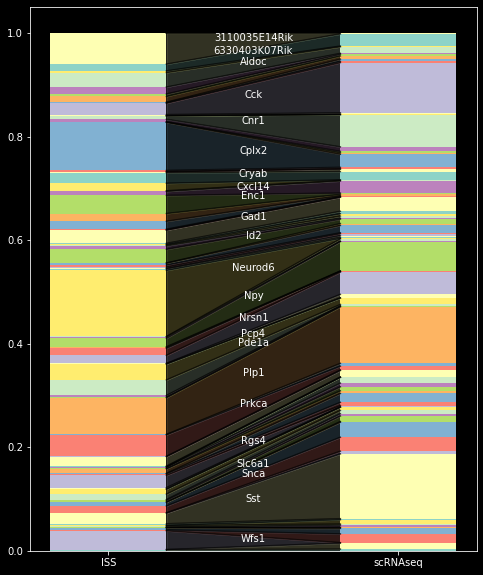

In [8]:
plt.figure(figsize=(8,10))
           
pl.hbar_compare(sdata.stats
                ,sdata.scanpy.stats,
                labels=['ISS','scRNAseq']
               )

In [9]:
sdata.var.loc['Cck','c_genes']='yellow'

(<matplotlib.collections.PathCollection at 0x7f22507babb0>,
 None,
 <matplotlib.legend.Legend at 0x7f22507ae160>)

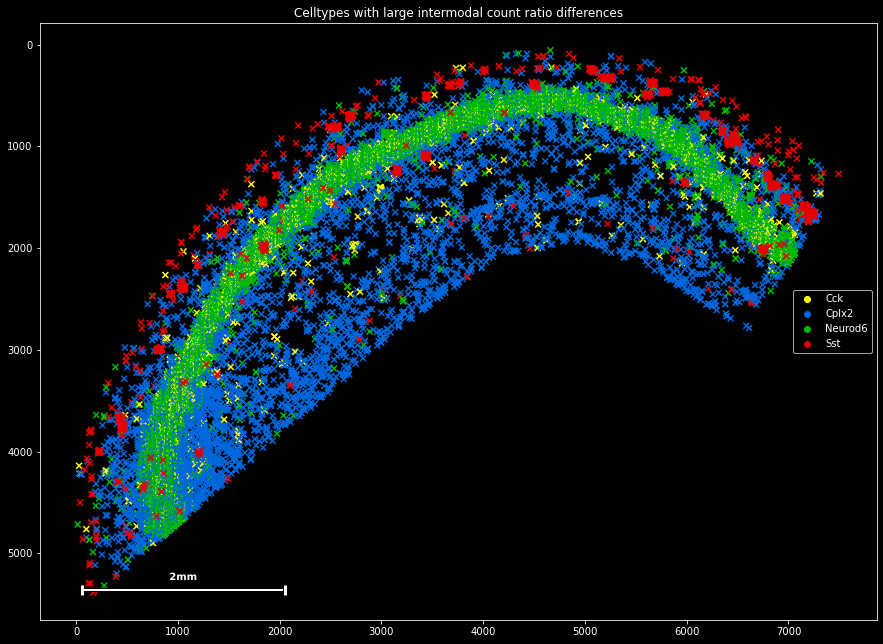

In [10]:

overrepresented=['Neurod6','Cck','Cplx2','Sst']

plt.title('Celltypes with large intermodal count ratio differences')

sdata[sdata.g.isin(overrepresented)].scatter(legend=True,marker='x')

In [ ]:
pl.hbar_compare(sdata.stats,sdata.scanpy.stats)
plt.xticks([0,1],['spatial','scRNAseq'])

In [102]:
sdata.scanpy

In [99]:
# np.char.mod(f'%f',sdata.scanpy.X[0])

import utils

signatures = sdata.scanpy.generate_signatures()

out = utils.ssam(sdata,signatures.T,kernel_bandwidth=5)

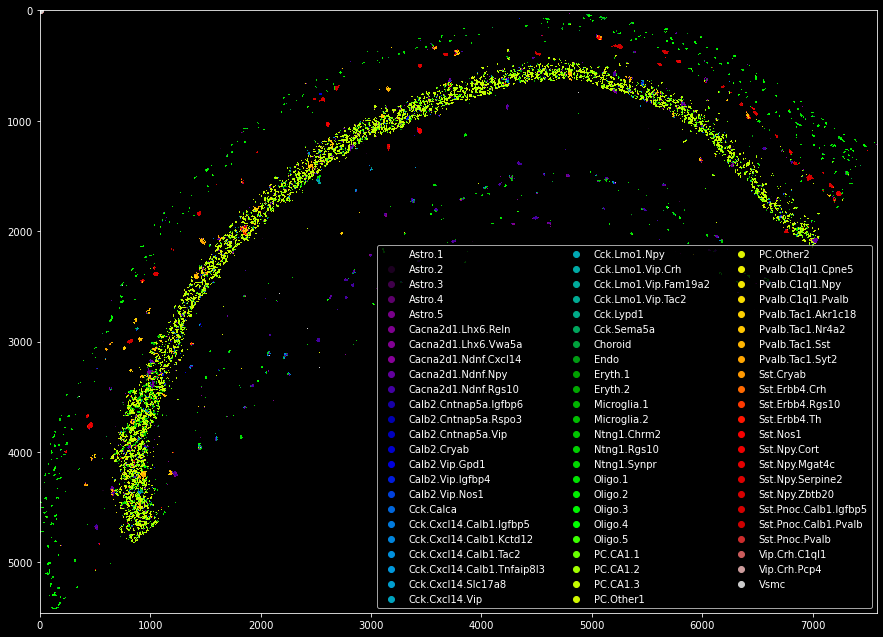

In [100]:
from matplotlib import cm

cmap = cm.get_cmap('nipy_spectral')
handlers = [plt.scatter([0],[0],color=cmap(f)) for f in np.linspace(0,1,len(sdata.scanpy.signature_matrix.index))]
plt.legend(handlers,sdata.scanpy.signature_matrix.index,ncol=3,loc='lower right')

plt.imshow(out,cmap='nipy_spectral',interpolation='none')

In [318]:

import utils

signatures = sdata.scanpy.generate_signatures(celltype_obs_marker='celltype')

# out = utils.ssam(sdata,sdata.scanpy.signature_matrix)

[autoreload of plankton failed: Traceback (most recent call last):
  File "/home/sebastian/anaconda3/envs/plankton-dev/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/home/sebastian/anaconda3/envs/plankton-dev/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/home/sebastian/anaconda3/envs/plankton-dev/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/home/sebastian/src/planktonpy/tutorials/../plankton/plankton.py", line 6, in <module>
    from sympy import N
ModuleNotFoundError: No module named 'sympy'
]


In [ ]:
knn_neighbors=200
bandwidth=60
n_neighbors=30
metric='euclidean'
min_dist=0.03
random_state=42
zero_weight=1

_=sdata.graph.update_knn(n_neighbors=knn_neighbors)

sdata.graph.run_umap(bandwidth=bandwidth,n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=random_state,zero_weight=zero_weight)



In [ ]:
sdata.graph.plot_umap()

In [ ]:
sdata.graph.umap_js()

In [ ]:
1

In [ ]:
sdata.scatter(c=sdata.graph.umap[:,0]+sdata.graph.umap[:,1]*0.3)

In [ ]:
sdata.scatter(c=sdata.graph.umap[:,1],cmap='autumn',vmin=0,vmax=10)

In [ ]:
tissues = ['radiatum','pyramidal','alveus']

tissue = np.argmax(sdata[tissues].to_numpy(),axis=1)
sdata['tissue']=(pd.Series(tissues)[tissue.astype(int)]).astype('category').values

In [ ]:
fig = plt.figure(figsize=(20,8), constrained_layout=True)
spec = fig.add_gridspec( 1,3)

ax0 = fig.add_subplot(spec[:,:1])

sdata[sdata.alveus].graph.plot_umap(c=sdata[sdata.alveus].graph.umap[:,1],cmap='Greys')
sdata[sdata.radiatum].graph.plot_umap(c=-sdata[sdata.radiatum].graph.umap[:,1],cmap='autumn')
sdata[sdata.pyramidal].graph.plot_umap(c=np.multiply(-sdata[sdata.pyramidal].graph.umap,[1,-0.5]).sum(1),cmap='winter')

ax1 = fig.add_subplot(spec[:,1:])
sdata[sdata.alveus].scatter(c=sdata[sdata.alveus].graph.umap[:,1],cmap='Greys',scalebar=False)
sdata[sdata.radiatum].scatter(c=-sdata[sdata.radiatum].graph.umap[:,1],cmap='autumn',alpha=0.5)
sdata[sdata.pyramidal].scatter(c=np.multiply(-sdata[sdata.pyramidal].graph.umap,[1,-0.5]).sum(1),cmap='winter',scalebar=False)

In [ ]:
signatures = sdata.scanpy.generate_signatures()

In [ ]:
sdata.graph.plot_umap(c=(np.argmax(signatures.to_numpy(),axis=0)==1)[sdata.gene_ids])

In [ ]:
import utils

out = utils.ssam(sdata)

In [ ]:
np.array(out)

In [191]:
out = sdata[sdata.cell!=0].squidpy(groupby='cell')

/home/sebastian/src/planktonpy/tutorials/../plankton/plankton.py:764: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=X, obs=obs, var=var, obsm=obsm)


In [196]:
out.obsm

AxisArrays with keys: spatial

In [164]:
sdata.counts.values

array([4340,  943,  235, 2024,  975,  338,  799,   79,   68, 1589,  141,
          5,   33,  473,  360,   20,   58, 6712,  168,    3,  141, 1478,
       1054,   83,  560, 2534, 1083, 1102,  108,   23, 1848,  134,   95,
        124,  478, 1914,   26,  265,  277,  175,   74,  210, 9235,   73,
        181, 1186,  113,  104,  989, 1110,   74,   27, 2228, 2157,  228,
         88, 5125,   66, 2998,   43, 1324,   95,   36,   25,  180,   48,
        634,   56,  218, 1719,  188,   28,  692,  759,  117,  238,   13,
        537,  944,   53, 1480,  232,   24,  199,   52,   27,   23,  303,
        119, 2623,   25,  151])